In [22]:
import tensorflow as tf

In [23]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

from keras.models import load_model

from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

from keras.datasets import mnist
import numpy as np 
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import cv2
from glob import glob
import os

In [24]:
def load_data(p):
    pattern = os.path.join(p,'*.jpg')
    files = glob(pattern)
    images = []
    targets = []
    for file in files :
        im = cv2.imread(file)
        im =(255-cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))/255.0
        images.append(im)
        chars = (list(os.path.splitext(os.path.basename(file))[0]))
        if len(chars) !=5 :
            continue
        targets.append(chars)
    images = np.array(images , ndmin=3) 
    targets = np.array (targets,ndmin=2)
    return images , targets

In [25]:
def train_data( train_add , test_add, n) :
    #data_founding
    x_train, y_train = load_data(train_add)
    x_test, y_test = load_data(test_add)
    #encoding
    encoder = LabelEncoder()
    encoder.fit (y_train.reshape(-1))
    with open( ' encoder.bin' , 'wb') as f :
        pickle.dump(encoder , f)
        
    #encoding transform
    
    y_train_encoded = encoder.transform(y_train.reshape(-1)).reshape(-1,5)
    y_test_encoded = encoder.transform(y_test.reshape(-1)).reshape(-1,5)
    
    num_classes = len(np.unique(y_train_encoded))
    
    yt = to_categorical(y_train_encoded[:, n], num_classes=num_classes)
    yt_test = to_categorical(y_test_encoded[:, n], num_classes=num_classes)

    
    
    #modeling 
    model = Sequential()
    model.add(Input(shape=(40,150,1)))
    # feature learning
    model.add(Conv2D(4, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(8, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2)))
    #classification
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    #model compile 
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

    #training
    h = model.fit( x_train , yt , validation_data=(x_test , yt_test) ,  epochs= 10 )

    model.save(f"model_char_{n}.h5")

    #model analysis
    print(model.summary())


    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.legend(['train' , 'test' ] )
    plt.xlabel('epoch')
    
    plt.subplot(1,2,2)
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.legend(['train' , 'test' ] )
    plt.xlabel('epoch')

Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.3285 - loss: 1.6555 - val_accuracy: 0.2809 - val_loss: 1.5752
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.5435 - loss: 1.1726 - val_accuracy: 0.5365 - val_loss: 1.1647
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.6598 - loss: 0.9008 - val_accuracy: 0.7388 - val_loss: 0.8254
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7508 - loss: 0.6525 - val_accuracy: 0.8090 - val_loss: 0.5615
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8420 - loss: 0.4251 - val_accuracy: 0.9213 - val_loss: 0.2957
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9176 - loss: 0.2306 - val_accuracy: 0.9410 - val_loss: 0.1967
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9587 - loss: 0.1256 - val_accuracy: 0.9860 - val_loss: 0.0698
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9818 - loss: 0.0667 - val_acc

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 40, 150, 4)          │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 40, 150, 8)          │             296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 40, 150, 16)         │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 24000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │       3,072,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 60)                  │           3,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,257,366 (35.31 MB)

 Trainable params: 3,085,788 (11.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,171,578 (23.54 MB)

None
Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.0209 - loss: 4.0939 - val_accuracy: 0.0449 - val_loss: 4.0059
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.0268 - loss: 4.0788 - val_accuracy: 0.1685 - val_loss: 3.7144
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.0539 - loss: 3.9251 - val_accuracy: 0.2697 - val_loss: 2.9033
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.1392 - loss: 3.4181 - val_accuracy: 0.3792 - val_loss: 2.5615
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.2983 - loss: 2.6593 - val_accuracy: 0.6742 - val_loss: 1.5262
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.5365 - loss: 1.7130 - val_accuracy: 0.8567 - val_loss: 0.6787
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7553 - loss: 0.8875 - val_accuracy: 0.9522 - val_loss: 0.3180
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8938 - loss: 0.3971 - va

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 40, 150, 4)          │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 40, 150, 8)          │             296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 40, 150, 16)         │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 20, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 24000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │       3,072,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 60)                  │           3,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,257,366 (35.31 MB)

 Trainable params: 3,085,788 (11.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,171,578 (23.54 MB)

None
Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.0181 - loss: 4.1022 - val_accuracy: 0.0253 - val_loss: 4.0886
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.0208 - loss: 4.0849 - val_accuracy: 0.0562 - val_loss: 4.0152
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.0661 - loss: 3.8853 - val_accuracy: 0.2781 - val_loss: 3.1761
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.2307 - loss: 3.0255 - val_accuracy: 0.5983 - val_loss: 1.9001
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.5280 - loss: 1.7646 - val_accuracy: 0.8146 - val_loss: 0.8491
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7926 - loss: 0.7723 - val_accuracy: 0.9270 - val_loss: 0.3439
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9269 - loss: 0.2775 - val_accuracy: 0.9635 - val_loss: 0.1609
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9708 - loss: 0.1218 - va

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 40, 150, 4)          │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 40, 150, 8)          │             296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 40, 150, 16)         │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 20, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 24000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │       3,072,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 60)                  │           3,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,257,366 (35.31 MB)

 Trainable params: 3,085,788 (11.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,171,578 (23.54 MB)

None
Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.0191 - loss: 4.0994 - val_accuracy: 0.0197 - val_loss: 4.0921
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.0231 - loss: 4.0831 - val_accuracy: 0.0506 - val_loss: 4.0378
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.0579 - loss: 3.9139 - val_accuracy: 0.1910 - val_loss: 3.4205
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1856 - loss: 3.2543 - val_accuracy: 0.4803 - val_loss: 2.3180
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.4258 - loss: 2.1972 - val_accuracy: 0.7444 - val_loss: 1.1852
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6624 - loss: 1.2280 - val_accuracy: 0.8820 - val_loss: 0.5495
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8416 - loss: 0.5698 - val_accuracy: 0.9775 - val_loss: 0.1975
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9350 - loss: 0.2483 - va

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 40, 150, 4)          │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 40, 150, 8)          │             296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 40, 150, 16)         │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 20, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 24000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │       3,072,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 60)                  │           3,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,257,366 (35.31 MB)

 Trainable params: 3,085,788 (11.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,171,578 (23.54 MB)

None
Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.0157 - loss: 4.0996 - val_accuracy: 0.0337 - val_loss: 4.0923
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.0205 - loss: 4.0909 - val_accuracy: 0.0393 - val_loss: 4.0527
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.0442 - loss: 3.9886 - val_accuracy: 0.1685 - val_loss: 3.4776
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.1999 - loss: 3.1784 - val_accuracy: 0.5674 - val_loss: 2.0736
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.4856 - loss: 1.9329 - val_accuracy: 0.7697 - val_loss: 0.9848
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7694 - loss: 0.8558 - val_accuracy: 0.9551 - val_loss: 0.2727
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9345 - loss: 0.2685 - val_accuracy: 0.9860 - val_loss: 0.0967
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9808 - loss: 0.0899 - va

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 40, 150, 4)          │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 40, 150, 8)          │             296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 40, 150, 16)         │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 20, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 24000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │       3,072,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 60)                  │           3,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,257,366 (35.31 MB)

 Trainable params: 3,085,788 (11.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,171,578 (23.54 MB)

None


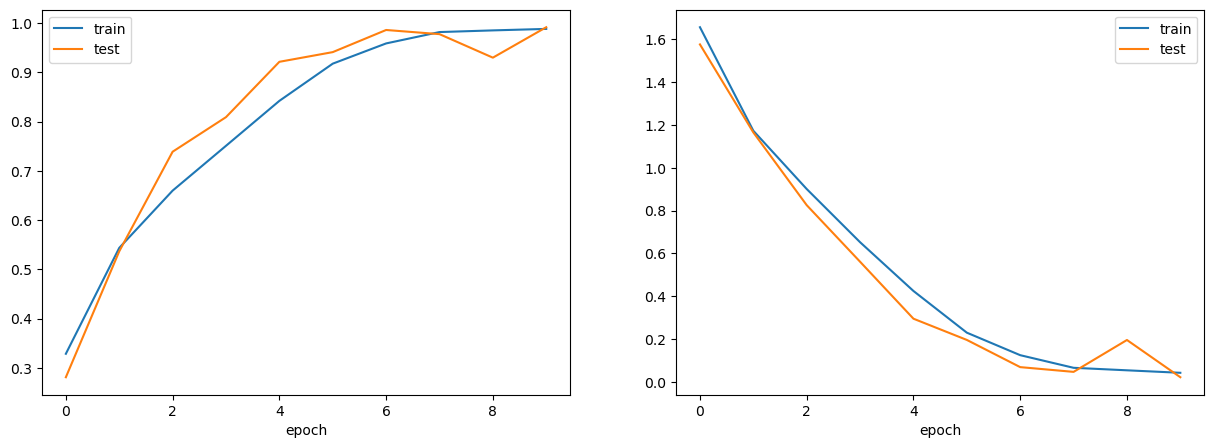

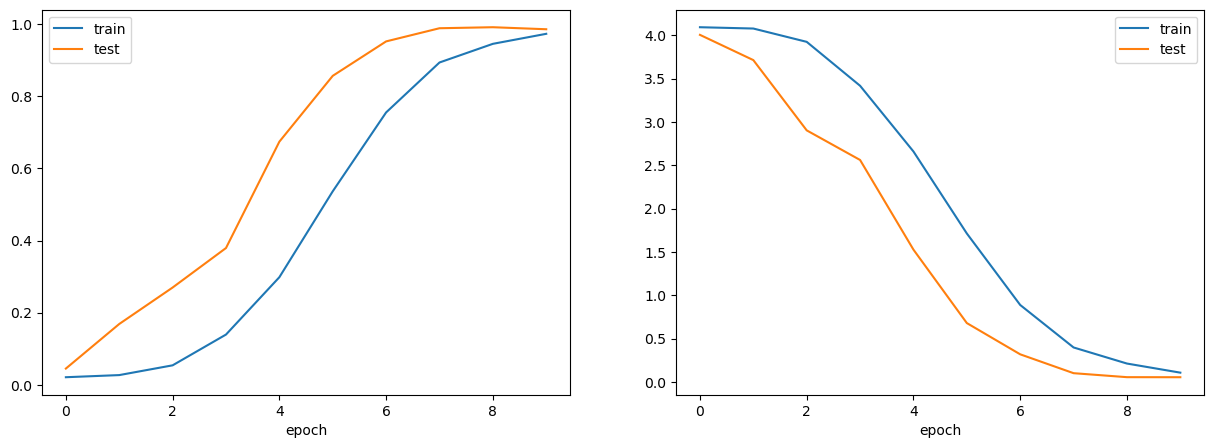

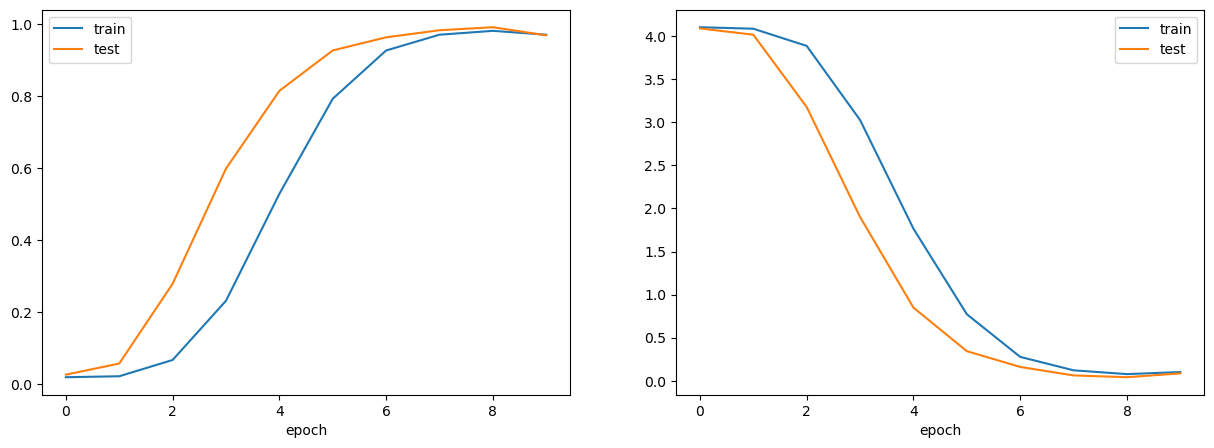

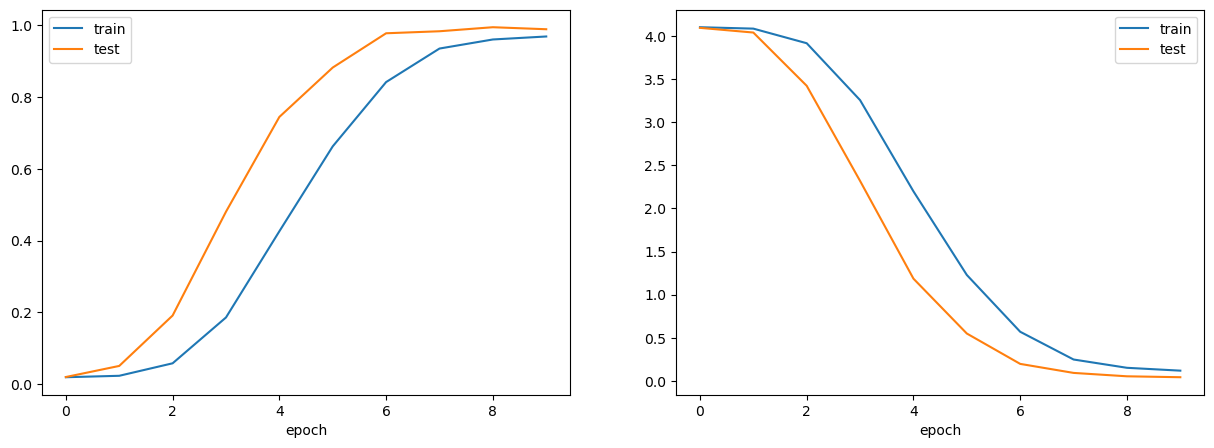

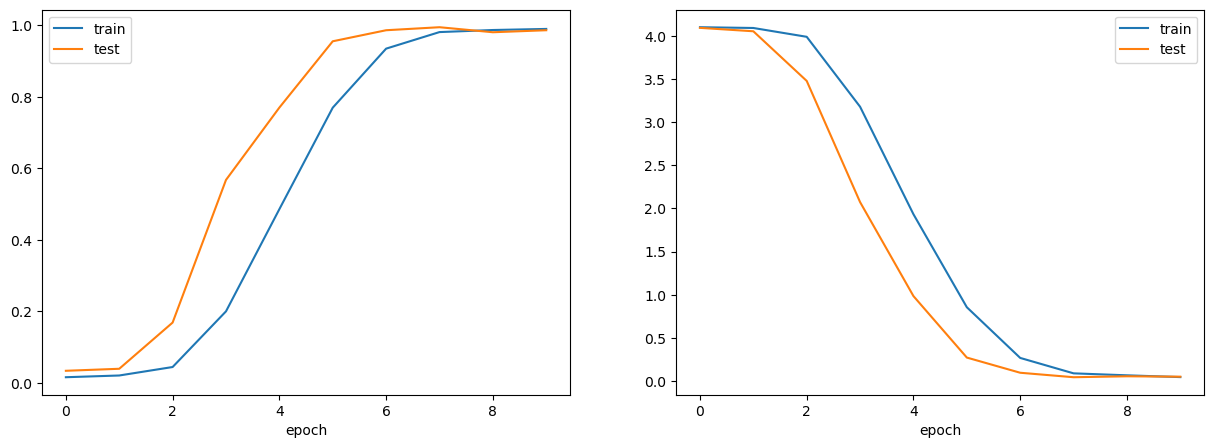

In [26]:
for i in range(0,5):
    train_data("E:\\AI.anisa.python\\archive(2)\\train-1" ,"E:\\AI.anisa.python\\archive(2)\\test-2",i)


In [27]:
def prediction(file, encoder):
    im = cv2.imread(file)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = (255 - im) / 255.0
    im = im.reshape(1, 40, 150, 1)

    preds = []
    for i in range(5):
        model = tf.keras.models.load_model(f"model_char_{i}.h5")
        r = model.predict(im)
        pred_index = np.argmax(r)
        pred_label = encoder.inverse_transform([pred_index])[0]
        preds.append(pred_label)
    return preds


In [28]:
with open('encoder.bin', 'rb') as f:
    encoder = pickle.load(f)
